## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_df = pd.merge(mouse_metadata, study_results, how="left", on= "Mouse ID")
# Display the data table for preview
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
new_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_df.loc[new_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
new_df.loc[new_df['Mouse ID']=='g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df=new_df.loc[new_df['Mouse ID']!='g989']
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_count=len(new_df['Mouse ID'].unique())
new_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
status_regimen= new_df.groupby(['Drug Regimen']).mean()
status_regimen

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [8]:
status_regimen_tumor_volume_mean= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
status_regimen_tumor_volume_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
status_regimen_tumor_volume_median= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
status_regimen_tumor_volume_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
status_regimen_tumor_volume_variance= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
status_regimen_tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
status_regimen_tumor_volume_std= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
status_regimen_tumor_volume_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
status_regimen_tumor_volume_sem= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
status_regimen_tumor_volume_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Assemble the resulting series into a single summary dataframe
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean":status_regimen_tumor_volume_mean, "Median":status_regimen_tumor_volume_median,"Variance":status_regimen_tumor_volume_variance, "Std Dev":status_regimen_tumor_volume_std,"SEM":status_regimen_tumor_volume_sem})

summary_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

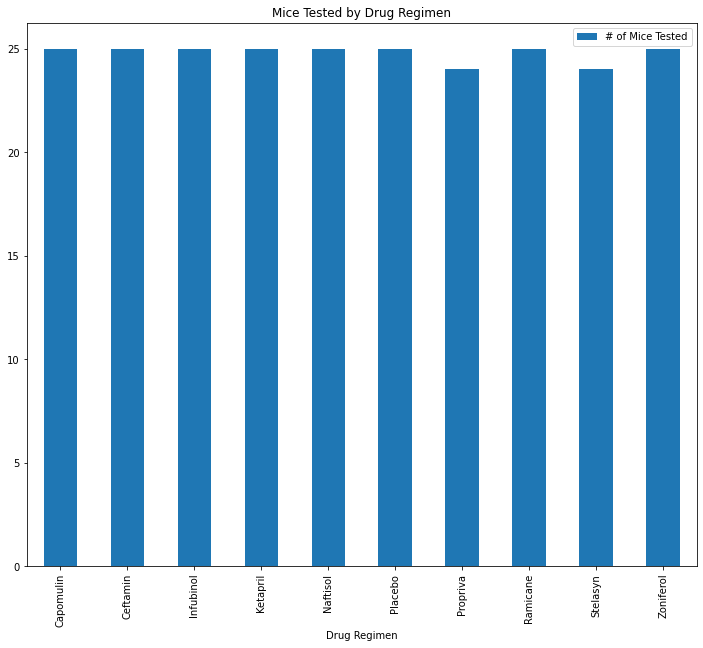

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
new_df2=pd.DataFrame(new_df)
mouse_count_unique=new_df2.groupby('Drug Regimen')['Mouse ID'].nunique()
mouse_count_unique_df=pd.DataFrame(mouse_count_unique)
mouse_count_unique_df1=mouse_count_unique_df.rename(columns={"Mouse ID":"# of Mice Tested"})
mouse_count_unique_df1.plot(kind="bar",figsize=(12,10))
plt.title("Mice Tested by Drug Regimen")
plt.show()
plt.tight_layout()


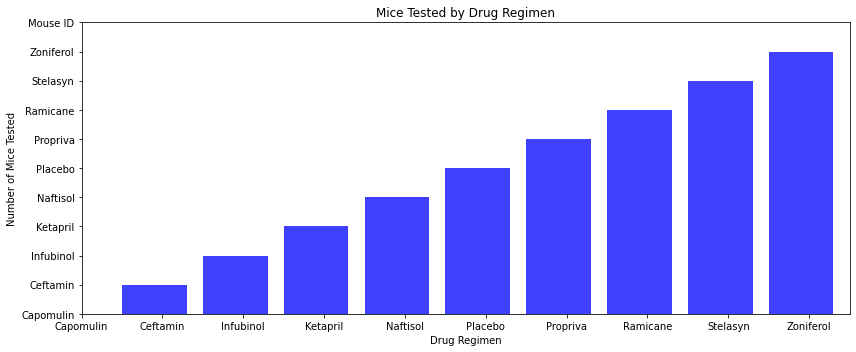

In [38]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse_count_unique2=new_df.groupby('Drug Regimen')['Mouse ID'].nunique()
mouse_count_unique2=mouse_count_unique2.reset_index()
#mouse_count_unique2
x_axis=np.arange(len(mouse_count_unique2))
tick_locations=[value +0.5 for value in x_axis]
plt.figure(figsize=(12,5))
plt.bar(x_axis, mouse_count_unique2['Drug Regimen'],color='b',alpha=0.75,align='edge')
plt.xticks(tick_locations,mouse_count_unique2['Drug Regimen'],rotation='horizontal')
plt.xlim(0.5,len(x_axis))
plt.ylim(0,max(mouse_count_unique2))
plt.title("Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [ ]:
# Start by getting the last (greatest) timepoint for each mouse


In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
    

In [ ]:
# Create empty list to fill with tumor vol data (for plotting)

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
    # Locate the rows which contain mice on each drug and get the tumor volumes

In [ ]:
    # add subset

In [ ]:
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
